# Import basic package

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

# Load CSV

In [2]:
FTRAIN = '../data/training.csv'
FTEST = '../data/test.csv'

In [3]:
df = pd.read_csv(FTRAIN)

## => 일단 정보가 완벽하지 않은 row는 모두 제외 후 진행

In [4]:
def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = FTEST if test else FTRAIN
    df = pd.read_csv(fname)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print("len : {}".format(len(df)))
    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them
    print("drop len : {}".format(len(df)))

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(y.shape, y.min(), y.max()))
df.tail(1)

len : 7049
left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mou

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
7048,66.938311,43.42451,31.096059,39.528604,NaN,NaN,NaN,NaN,NaN,NaN,...,73.033339,NaN,NaN,NaN,NaN,NaN,NaN,45.90048,82.773096,53 62 67 76 86 91 97 105 105 106 107 108 112 1...


# Import additive package for Neural net

In [5]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.
/Users/ray/.pyenv/versions/3.6.1/envs/python_dss/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1. Single Layer

>## Setting & Fitting

In [6]:
net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 9216),  # 96x96 input pixels per batch
    hidden_num_units=100,  # number of units in hidden layer
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=30,  # 30 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=400,  # we want to train this many epochs
    verbose=1,
    )

X, y = load()
net1.fit(X, y)

len : 7049
left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mou

    102     0.00445     0.00515    0.86374  0.31s
    103     0.00443     0.00513    0.86354  0.33s
    104     0.00441     0.00511    0.86303  0.31s
    105     0.00440     0.00510    0.86193  0.27s
    106     0.00438     0.00509    0.86047  0.28s
    107     0.00437     0.00509    0.85891  0.25s
    108     0.00436     0.00508    0.85740  0.24s
    109     0.00434     0.00507    0.85623  0.24s
    110     0.00433     0.00506    0.85589  0.24s
    111     0.00431     0.00504    0.85630  0.24s
    112     0.00429     0.00500    0.85815  0.24s
    113     0.00427     0.00496    0.86073  0.24s
    114     0.00425     0.00492    0.86394  0.24s
    115     0.00423     0.00488    0.86723  0.24s
    116     0.00422     0.00485    0.86917  0.24s
    117     0.00420     0.00484    0.86910  0.25s
    118     0.00419     0.00485    0.86393  0.24s
    119     0.00418     0.00494    0.84662  0.24s
    120     0.00424     0.00527    0.80433  0.24s
    121     0.00455     0.00619    0.73597  0.24s


    247     0.00306     0.00382    0.80145  0.29s
    248     0.00303     0.00378    0.80349  0.29s
    249     0.00304     0.00377    0.80592  0.30s
    250     0.00307     0.00378    0.81061  0.32s
    251     0.00307     0.00377    0.81495  0.29s
    252     0.00304     0.00375    0.80909  0.28s
    253     0.00301     0.00381    0.78929  0.26s
    254     0.00305     0.00398    0.76637  0.25s
    255     0.00317     0.00422    0.75204  0.25s
    256     0.00331     0.00431    0.76787  0.26s
    257     0.00328     0.00407    0.80523  0.25s
    258     0.00307     0.00376    0.81625  0.25s
    259     0.00301     0.00385    0.78232  0.25s
    260     0.00333     0.00427    0.78051  0.26s
    261     0.00364     0.00426    0.85366  0.26s
    262     0.00340     0.00383    0.88776  0.25s
    263     0.00302     0.00373    0.80897  0.30s
    264     0.00304     0.00421    0.72214  0.31s
    265     0.00340     0.00471    0.72158  0.29s
    266     0.00359     0.00452    0.79355  0.30s


    398     0.00246     0.00332    0.73937  0.29s
    399     0.00238     0.00325    0.73224  0.29s
    400     0.00237     0.00327    0.72693  0.29s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x119b1b940>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x119b1b908>,
     check_input=True, custom_scores=None, hidden_num_units=100,
     input_shape=(None, 9216),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<function objective at 0x119d22ae8>,
     objective_loss_function=<function squared_error at 0x119a2e488>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x119d2e128>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo object at 0x119d2e160>],
     output_nonlinearity=None, output_num_units=30, regression=True,
     scores_train=[], scores_valid=[],
     train_spl

>## Graph of train_loss & valid_loss in each epoch

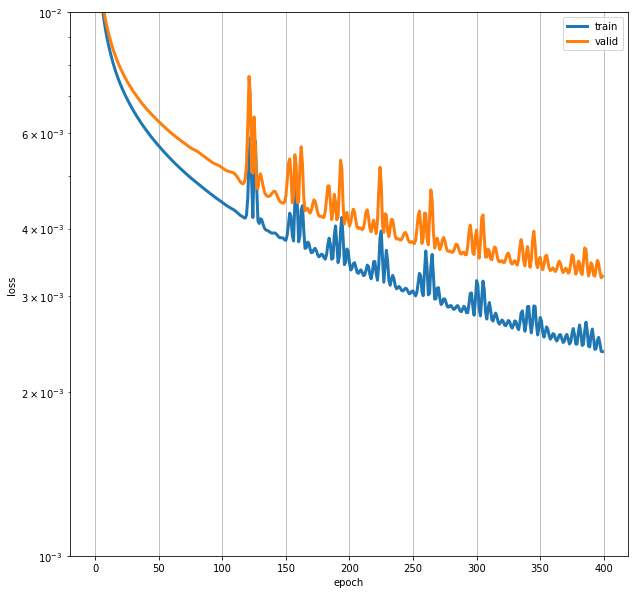

In [7]:
train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
plt.figure(figsize=(10,10))
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-3, 1e-2)
plt.yscale("log")
plt.show()

>## Result

len : 1783
ImageId    1783
Image      1783
dtype: int64
drop len : 1783


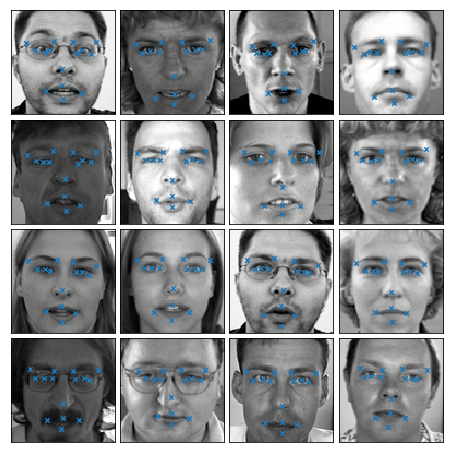

In [8]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=20)

X, _ = load(test=True)
y_pred = net1.predict(X)

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

plt.show()

In [9]:
lst = list(np.ravel(np.array(y_pred * 48 + 48)))
for i in range(len(lst)):
    if lst[i]>96:
        print(i)

4919
19889
26249
28799
30329
39719
40109
42239


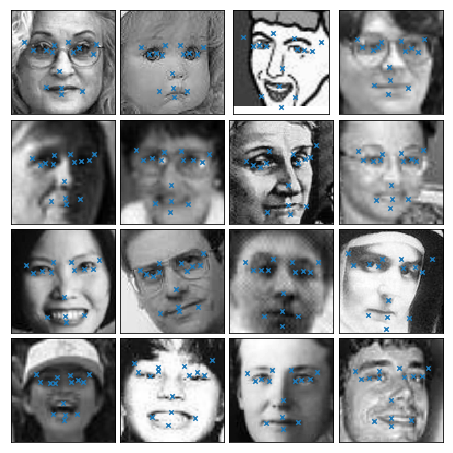

In [10]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i+660], y_pred[i+660], ax)

plt.show()

>## Save csv

In [11]:
idlookup_df = pd.read_csv('../data/IdLookupTable.csv')
ss_df = pd.read_csv('../data/SampleSubmission.csv')

lst = list(np.ravel(np.array(y_pred * 48 + 48)))
lst_col = [df.columns[i%30] for i in range(1783*30)]

cnt=0
for i in range(len(lst)):
    if lst[i]>96:
        cnt+=1
        lst[i] = 96
    elif lst[i]<0:
        cnt+=1
        lst[i] = 0
print("over 0~96 : {}".format(cnt))

i=0
while i < 27124:
    if idlookup_df['FeatureName'].iloc[i] != lst_col[i]:
        lst_col.pop(i);lst.pop(i)
        i-=1
    i+=1
    
ss_df['Location'] = lst

tmp = ss_df.set_index(ss_df['RowId'])
del tmp['RowId']

tmp.to_csv('../data/SampleSubmission_model_1.csv')

over 0~96 : 9
